### Convolution example

Usage example for a multiclass classification image using convolutional neural networks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from DNet.model import NNet
from DNet.layers import (
    LinearLayer, 
    ReLU, 
    CrossEntropyLoss, 
    Conv2D,
    MaxPooling2D, 
    AveragePooling2D,
    Flatten
)
from DNet.optimizers import Adam

### Our Dataset
We will be using the digits dataset.

In [4]:
digits = load_digits()

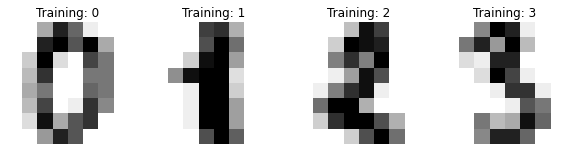

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [6]:
images = digits.images
m, h, w = images.shape
images = images.reshape(m, 1, h, w)

target = digits.target

def one_hot_encoding(Y):
    """
    One hot enconding method.
    """
    one_hot = np.zeros((Y.size, Y.max() + 1))
    one_hot[np.arange(Y.size), Y] = 1

    return one_hot

x_train, x_test, y_train, y_test = train_test_split(
    images, target, test_size=0.4, random_state=1
)
y_train = one_hot_encoding(y_train)

### Model
Let's create the convolutional model.

In [7]:
# Initialize the model
model = NNet()

# Create the model structure
model.add(Conv2D(1, 2, kernel_size=(2, 2), stride=2, padding=1))
model.add(AveragePooling2D(kernel_size=(2, 2), stride=1, padding=1))
model.add(ReLU())

model.add(Conv2D(2, 1, kernel_size=(2, 2), stride=1, padding=0))
model.add(AveragePooling2D(kernel_size=(2, 2), stride=1, padding=0))
model.add(ReLU())

model.add(Flatten())
model.add(LinearLayer(16, 10))

# set the loss functions and the optimize method
loss = CrossEntropyLoss()
optim = Adam(lr=0.05)

### Train and Evaluate

Train and evaluate the model.

In [9]:
# Train the model
costs = []
epochs = 10000

for epoch in range(epochs):
    model.forward(x_train.T)
    cost = model.loss(y_train.T, loss)
    model.backward()
    model.optimize(optim)

    if epoch % 500 == 0:
        print ("Cost after iteration %epoch: %f" %(epoch, cost))
        costs.append(cost)

Cost after iteration 0.000000e+00poch: 2.380699
Cost after iteration 5.000000e+02poch: 0.251575
Cost after iteration 1.000000e+03poch: 0.192159
Cost after iteration 1.500000e+03poch: 0.177141
Cost after iteration 2.000000e+03poch: 0.170185
Cost after iteration 2.500000e+03poch: 0.137943
Cost after iteration 3.000000e+03poch: 0.121868
Cost after iteration 3.500000e+03poch: 0.118095
Cost after iteration 4.000000e+03poch: 0.100716
Cost after iteration 4.500000e+03poch: 0.091016
Cost after iteration 5.000000e+03poch: 0.086866
Cost after iteration 5.500000e+03poch: 0.085954
Cost after iteration 6.000000e+03poch: 0.080688
Cost after iteration 6.500000e+03poch: 0.077968
Cost after iteration 7.000000e+03poch: 0.073803
Cost after iteration 7.500000e+03poch: 0.078520
Cost after iteration 8.000000e+03poch: 0.077568
Cost after iteration 8.500000e+03poch: 0.076739
Cost after iteration 9.000000e+03poch: 0.071837
Cost after iteration 9.500000e+03poch: 0.071805


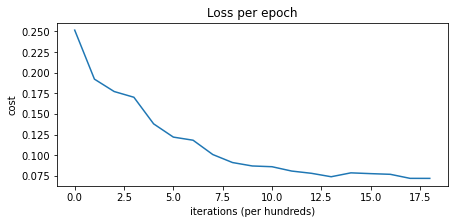

In [45]:
# plot the loss evolution
costs_ss = pd.Series(costs[1:])

plt.figure(figsize=(7, 3))
plt.plot(costs_ss)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Loss per epoch')
plt.show()

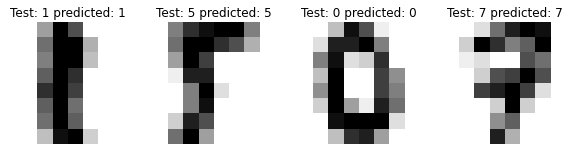

In [44]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

predictions = model.forward(x_test.T)
predictions = predictions.argmax(axis=0)


for ax, image, label, pred in zip(axes, x_test.reshape((719, 8, 8)), y_test, predictions):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test: ' +str(label) + ' predicted: ' + str(pred))